Becca Suchower

# Orbital Mechanics Notebook




In [100]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *


Here's a question from the web site [Ask an Astronomer](http://curious.astro.cornell.edu/about-us/39-our-solar-system/the-earth/other-catastrophes/57-how-long-would-it-take-the-earth-to-fall-into-the-sun-intermediate):

"If the Earth suddenly stopped orbiting the Sun, I know eventually it would be pulled in by the Sun's gravity and hit it. How long would it take the Earth to hit the Sun? I imagine it would go slowly at first and then pick up speed."


In [101]:
# Here are the units we'll need

s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter
y = UNITS.year

<Unit('year')>

In [102]:
# And an inition condition (with everything in SI units)

x = 147e9 * m
y = 0 * m
vx = 0 * m/s
vy = 30330 * m/s

init = State(x = x,
             y = y,
             vx = vx,
             vy = vy)

,values
x,147000000000.0 meter
y,0 meter
vx,0.0 meter / second
vy,30330.0 meter / second


In [103]:
# Making a system object

r_earth = 6.371e6 * m
r_sun = 695.508e6 * m

system = System(init=init,
                G=6.674e-11 * N / kg**2 * m**2,
                m1=1.989e30 * kg,
                r_final=r_sun + r_earth,
                m2=5.972e24 * kg,
                t_0=0 * s,
                t_end=60*60*24*365 * s,
                dt=0.1 * s)

,values
init,x 147000000000.0 meter y ...
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
m1,1.989e+30 kilogram
r_final,701879000.0 meter
m2,5.972e+24 kilogram
t_0,0 second
t_end,31536000 second
dt,0.1 second


In [104]:
# Here's a function that computes the force of gravity

def universal_gravitation(state, system):
    """Computes gravitational force.
    
    state: State object with distance r
    system: System object with m1, m2, and G
    """
    x, y, vx, vy = state
    unpack(system)
    
    r = Vector(x, y) * m
    
    force = G * m1 * m2 / r.mag**2
    f_vector = -r.hat() * force
    return f_vector

In [105]:
universal_gravitation(init, system)

<Quantity([-3.6686486e+22 -0.0000000e+00], 'newton / meter ** 2')>

In [106]:
# The slope function

def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x, y, vx, vy = state
    unpack(system)    
        
    f_vector = universal_gravitation(state, system)
  
    v = Vector(vx, vy)
    dxdt = vx
    dydt = vy
    
    dvdt = f_vector / m2
    dvxdt = dvdt.x
    dvydt = dvdt.y
    
    return dxdt, dydt, dvxdt, dvydt

In [107]:
# Always test the slope function!

slope_func(init, 0, system)

(<Quantity(0.0, 'meter / second')>,
 <Quantity(30330.0, 'meter / second')>,
 <Quantity(-0.006143082049146188, 'newton / kilogram / meter ** 2')>,
 <Quantity(-0.0, 'newton / kilogram / meter ** 2')>)

In [108]:
timesteps = linspace(system.t_0, system.t_end, 1000)


<Quantity([       0.            31567.56756757    63135.13513514    94702.7027027
   126270.27027027   157837.83783784   189405.40540541   220972.97297297
   252540.54054054   284108.10810811   315675.67567568   347243.24324324
   378810.81081081   410378.37837838   441945.94594595   473513.51351351
   505081.08108108   536648.64864865   568216.21621622   599783.78378378
   631351.35135135   662918.91891892   694486.48648649   726054.05405405
   757621.62162162   789189.18918919   820756.75675676   852324.32432432
   883891.89189189   915459.45945946   947027.02702703   978594.59459459
  1010162.16216216  1041729.72972973  1073297.2972973   1104864.86486486
  1136432.43243243  1168000.          1199567.56756757  1231135.13513514
  1262702.7027027   1294270.27027027  1325837.83783784  1357405.40540541
  1388972.97297297  1420540.54054054  1452108.10810811  1483675.67567568
  1515243.24324324  1546810.81081081  1578378.37837838  1609945.94594595
  1641513.51351351  1673081.08108108  1704648.64864865  1736216.21621622
  1767783.78378378  1799351.35135135  1830918.91891892  1862486.48648649
  1894054.05405405  1925621.62162162  1957189.18918919  1988756.75675676
  2020324.32432432  2051891.89189189  2083459.45945946  2115027.02702703
  2146594.59459459  2178162.16216216  2209729.72972973  2241297.2972973
  2272864.86486486  2304432.43243243  2336000.          2367567.56756757
  2399135.13513514  2430702.7027027   2462270.27027027  2493837.83783784
  2525405.40540541  2556972.97297297  2588540.54054054  2620108.10810811
  2651675.67567568  2683243.24324324  2714810.81081081  2746378.37837838
  2777945.94594595  2809513.51351351  2841081.08108108  2872648.64864865
  2904216.21621622  2935783.78378378  2967351.35135135  2998918.91891892
  3030486.48648649  3062054.05405405  3093621.62162162  3125189.18918919
  3156756.75675676  3188324.32432432  3219891.89189189  3251459.45945946
  3283027.02702703  3314594.59459459  3346162.16216216  3377729.72972973
  3409297.2972973   3440864.86486486  3472432.43243243  3504000.
  3535567.56756757  3567135.13513514  3598702.7027027   3630270.27027027
  3661837.83783784  3693405.40540541  3724972.97297297  3756540.54054054
  3788108.10810811  3819675.67567568  3851243.24324324  3882810.81081081
  3914378.37837838  3945945.94594595  3977513.51351351  4009081.08108108
  4040648.64864865  4072216.21621622  4103783.78378378  4135351.35135135
  4166918.91891892  4198486.48648649  4230054.05405405  4261621.62162162
  4293189.18918919  4324756.75675676  4356324.32432432  4387891.89189189
  4419459.45945946  4451027.02702703  4482594.59459459  4514162.16216216
  4545729.72972973  4577297.2972973   4608864.86486486  4640432.43243243
  4672000.          4703567.56756757  4735135.13513513  4766702.7027027
  4798270.27027027  4829837.83783784  4861405.4054054   4892972.97297297
  4924540.54054054  4956108.10810811  4987675.67567568  5019243.24324324
  5050810.81081081  5082378.37837838  5113945.94594595  5145513.51351351
  5177081.08108108  5208648.64864865  5240216.21621622  5271783.78378378
  5303351.35135135  5334918.91891892  5366486.48648649  5398054.05405405
  5429621.62162162  5461189.18918919  5492756.75675676  5524324.32432432
  5555891.89189189  5587459.45945946  5619027.02702703  5650594.59459459
  5682162.16216216  5713729.72972973  5745297.2972973   5776864.86486486
  5808432.43243243  5840000.          5871567.56756757  5903135.13513513
  5934702.7027027   5966270.27027027  5997837.83783784  6029405.4054054
  6060972.97297297  6092540.54054054  6124108.10810811  6155675.67567568
  6187243.24324324  6218810.81081081  6250378.37837838  6281945.94594595
  6313513.51351351  6345081.08108108  6376648.64864865  6408216.21621622
  6439783.78378378  6471351.35135135  6502918.91891892  6534486.48648649
  6566054.05405405  6597621.62162162  6629189.18918919  6660756.75675676
  6692324.32432432  6723891.89189189  6755459.45945946  6787027.02702703
  6818594.59459459  6850162.16216216  6881729.72972973  6913

In [109]:
# Run simulation

results, details = run_ode_solver(system, slope_func, t_eval = timesteps)
details


,values
sol,None
t_events,[]
nfev,152
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


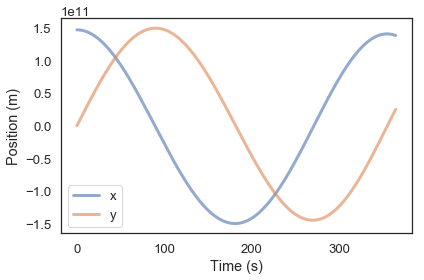

In [110]:
#Plot x and y vs time
results.index /= 60*60*24
plot(results.x, label='x')
plot(results.y, label='y')

decorate(xlabel='Time (s)',
         ylabel='Position (m)')

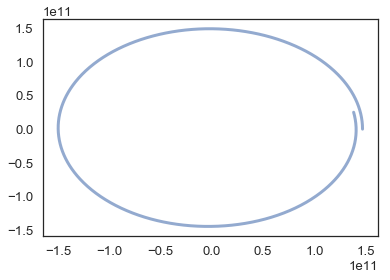

In [111]:
#Plot trajectory
plot(results.x, results.y, label='trajectory')